In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head(15)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [4]:
train_df.shape

(10240, 2)

In [5]:
train_df.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [6]:
# def create_distribution(dataFile):
#     return sb.countplot(x='label', data=dataFile, palette='hls')

# #by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
# create_distribution(train_df)

In [7]:
def data_qualityCheck():
    train_df.isnull().sum()
    train_df.info()  
    
data_qualityCheck()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


In [8]:
train_df = train_df.dropna()

In [9]:
data_qualityCheck()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


In [10]:
train_df.shape

(10240, 2)

In [11]:
train_df.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [12]:
train_df.reset_index(drop= True,inplace=True)

In [13]:
train_df.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [14]:
label_train = train_df['Label']
label_train

0        False
1         True
2         True
3        False
4         True
         ...  
10235     True
10236     True
10237     True
10238    False
10239    False
Name: Label, Length: 10240, dtype: bool

In [15]:
label_train.head(10)

0    False
1     True
2     True
3    False
4     True
5     True
6    False
7     True
8     True
9     True
Name: Label, dtype: bool

In [16]:
train_df = train_df.drop("Label", axis = 1)

In [17]:
train_df.head(10)

,Statement
0,Says the Annies List political group supports ...
1,When did the decline of coal start? It started...
2,"Hillary Clinton agrees with John McCain ""by vo..."
3,Health care reform legislation is likely to ma...
4,The economic turnaround started at the end of ...
5,The Chicago Bears have had more starting quart...
6,Jim Dunnam has not lived in the district he re...
7,I'm the only person on this stage who has work...
8,"However, it took $19.5 million in Oregon Lotte..."
9,Says GOP primary opponents Glenn Grothman and ...


In [18]:
train_df['Statement'][2188]

'Says 94 percent of Wisconsin employers think the state is heading in the right direction and a majority say they will grow their companies in 2012.'

In [93]:
label_train[2188]

True

In [19]:
custom_download_dir = "C:\\Users\\ysach/nltk"
nltk.data.path.append(custom_download_dir)

In [21]:
nltk.download('stopwords',download_dir=custom_download_dir)

[nltk_data] Downloading package stopwords to C:\Users\ysach/nltk...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [23]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
nltk.download('punkt',download_dir=custom_download_dir)
nltk.download('wordnet',download_dir=custom_download_dir)

[nltk_data] Downloading package punkt to C:\Users\ysach/nltk...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ysach/nltk...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
for x in range(len(train_df)) :
    corpus = []
    review = train_df['Statement'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['Statement'][x] = review

In [26]:
train_df['Statement'][2188]

'say percent wisconsin employer think state heading right direction majority say grow company'

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['Statement'], label_train, test_size=0.3, random_state=1)

In [28]:
X_train

3474    saysbarack obama voted language ofindianas rel...
6202                  say apple tim cook business indiana
5868    majority candidate stage supported amnesty nev...
7357          k home owner suicide attributed foreclosure
9514    thurbert baker kept teen jail didnt even commi...
                              ...                        
2895             u rep allen west want bring back earmark
7813                           oil drilling florida coast
905     last year weve put people back work advanced e...
5192       latin america economy almost big economy china
235                       say marco rubio one open border
Name: Statement, Length: 7168, dtype: object

In [29]:
X_train.shape

(7168,)

In [95]:
Y_train.shape

(7168,)

In [31]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [32]:
tfidf_X_train.shape

(7168, 9112)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    ngram_range=(1,1),
    max_features=250
)

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

In [71]:
a=[]

Accuracy: 55.66%
Model: Passive Aggressive Classifier
Confusion matrix, without normalization


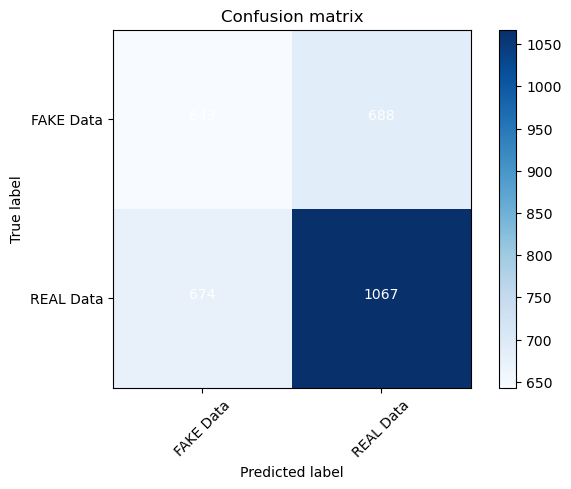

In [72]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
a.append(score)
print(f'Accuracy: {round(score*100,2)}%')
print('Model: Passive Aggressive Classifier')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [39]:
model = LogisticRegression(random_state=0,solver='saga',penalty='l1',max_iter=10000)
model.fit(tfidf_X_train,Y_train)


LogisticRegression(max_iter=10000, penalty='l1', random_state=0, solver='saga')

Accuracy: 59.6%
Model: Logistic Regression
Confusion matrix, without normalization


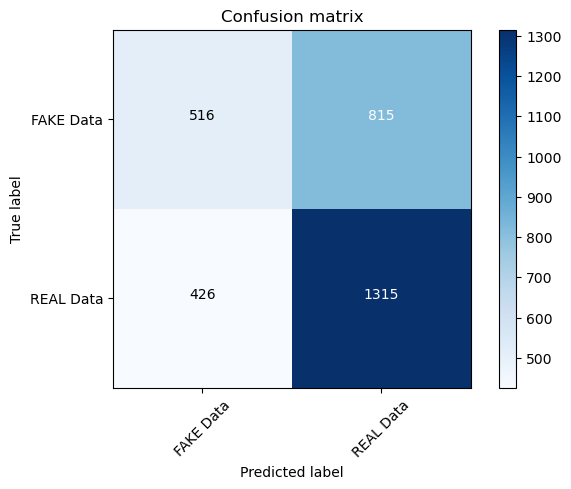

In [73]:
Y_pred = model.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
a.append(score)
print(f'Accuracy: {round(score*100,2)}%')
print('Model: Logistic Regression')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [47]:
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=0)
random_forest.fit(tfidf_X_train,Y_train)

RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=0)

Accuracy: 61.04%
Model: Random Forest Classifier
Confusion matrix, without normalization


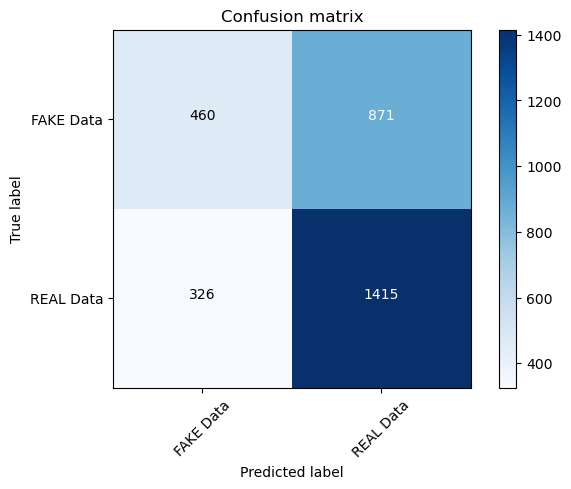

In [74]:
Y_pred = random_forest.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
a.append(score)
print(f'Accuracy: {round(score*100,2)}%')
print('Model: Random Forest Classifier')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [57]:
knn = KNeighborsClassifier(n_neighbors=18, weights='distance',algorithm='kd_tree')
knn.fit(tfidf_X_train,Y_train)

c:\Users\ysach\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=18, weights='distance')

Accuracy: 60.12%
Model: KNN Classifier
Confusion matrix, without normalization


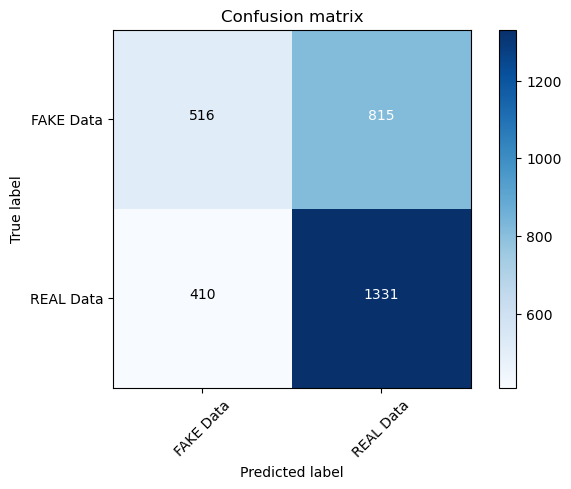

In [75]:
Y_pred = knn.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
a.append(score)
print(f'Accuracy: {round(score*100,2)}%')
print('Model: KNN Classifier')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [61]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=100000, random_state=0)
dtc.fit(tfidf_X_train,Y_train)

DecisionTreeClassifier(max_depth=100000, random_state=0)

Accuracy: 56.45%
Model: Decision Tress Classifier
Confusion matrix, without normalization


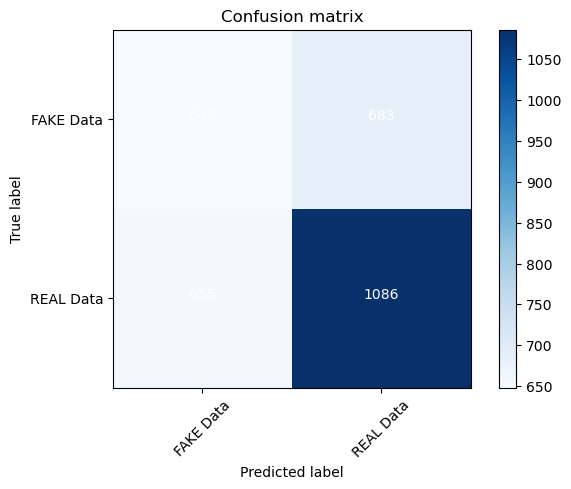

In [76]:
Y_pred = dtc.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
a.append(score)
print(f'Accuracy: {round(score*100,2)}%')
print('Model: Decision Tress Classifier')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [63]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 7.9 MB/s eta 0:00:00


In [68]:
from xgboost import XGBClassifier
model1 =XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    learning_rate=0.05,
    max_depth=10,
    n_estimators=1500,
    reg_alpha=3
)
model1.fit(tfidf_X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 61.07%
Model: XG Boost Classifier
Confusion matrix, without normalization


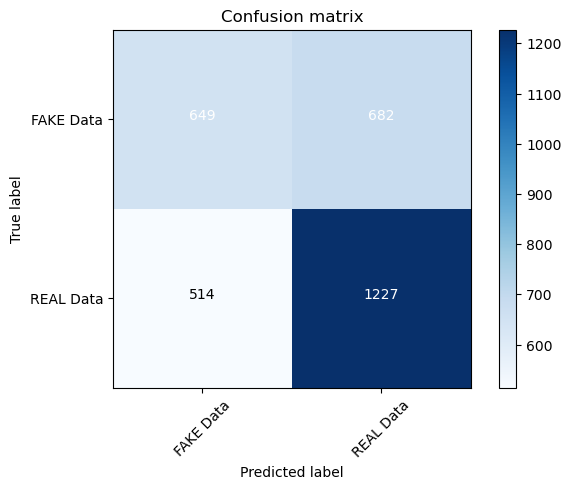

In [77]:
Y_pred = model1.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
a.append(score)
print(f'Accuracy: {round(score*100,2)}%')
print('Model: XG Boost Classifier')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [78]:
a

[0.556640625,
 0.5960286458333334,
 0.6103515625,
 0.6012369791666666,
 0.564453125,
 0.6106770833333334]

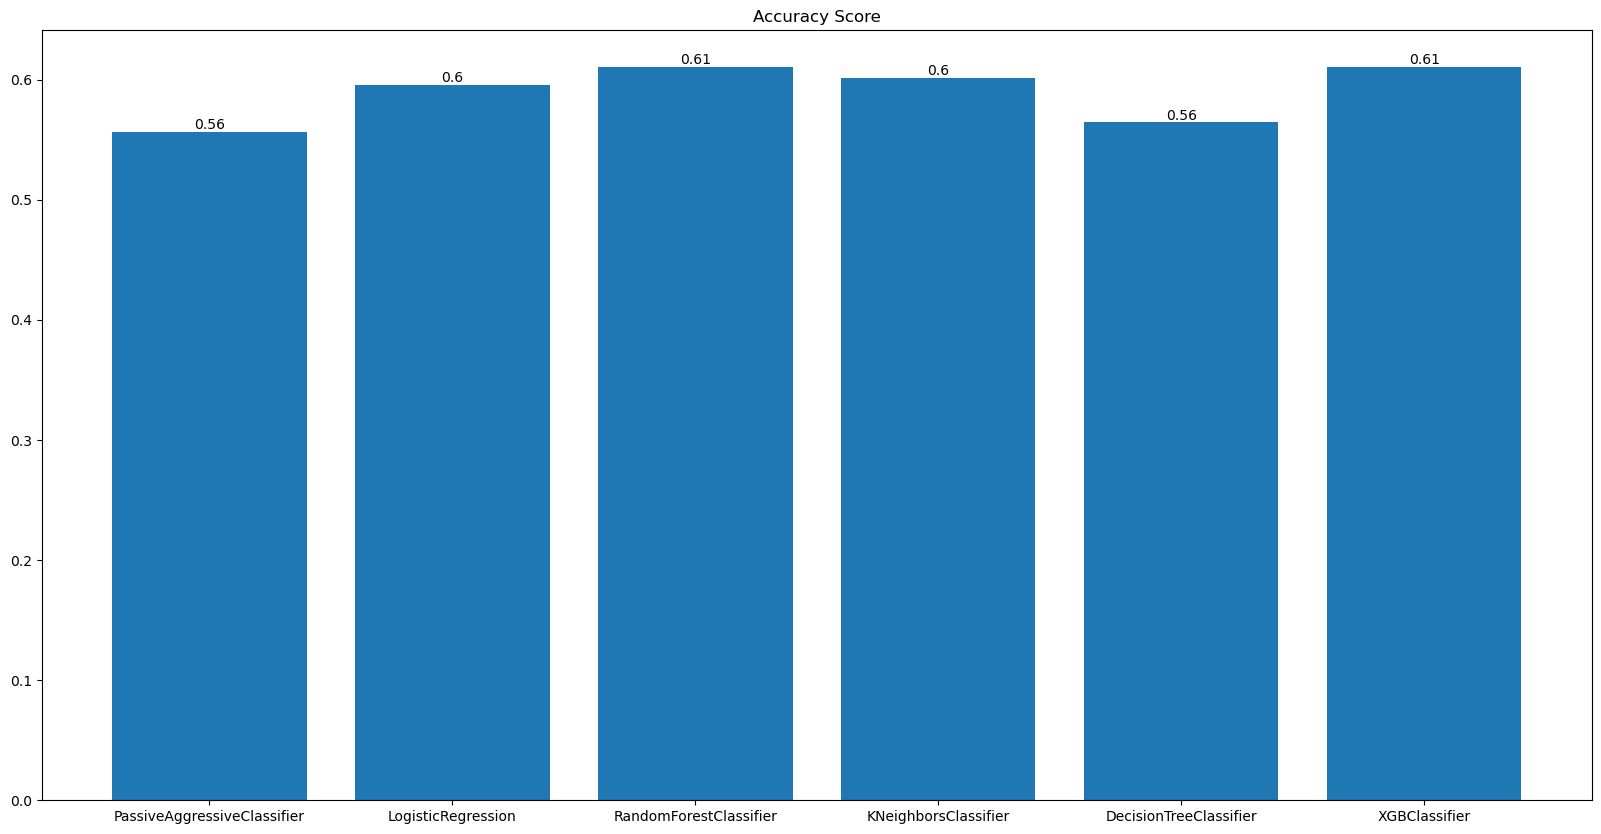

In [87]:
plt.figure(figsize=(20,10))
bars=plt.bar(['PassiveAggressiveClassifier','LogisticRegression','RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier','XGBClassifier'],a)
plt.title('Accuracy Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [88]:
#XGB classifier is the best model here.It identifies fake news better than the Random Forest which is the second best

In [89]:
pickle.dump(model1,open('./model.pkl', 'wb'))

In [90]:
# load the model from disk
loaded_model = pickle.load(open('./model.pkl', 'rb'))

In [91]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 0:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")

In [92]:
fake_news_det("Says 94 percent of Wisconsin employers think the state is heading in the right direction and a majority say they will grow their companies in 2012.")

Prediction of the News :  Looking Fake⚠ News📰 
